# About Dataset
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Two datasets were combined and few values were randomly removed.

Attribute Information:  
Input variables (based on physicochemical tests): 
1. fixed acidity
1. volatile acidity
1. citric acid
1. residual sugar
1. chlorides
1. free sulfur dioxide
1. total sulfur dioxide
1. density
1. pH
1. sulphates
1. alcohol
1. quality (score between 0 and 10)

# Importing Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the Dataset

In [6]:
data = pd.read_csv('winequalityN.csv')
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# information on statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
# information on datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Preprocessing the Dataset

In [10]:
# checking for any null values
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [12]:
# filling the missing values
for col, value in data.items():
    if col != 'type':
        data[col] = data[col].fillna(data[col].mean())

In [13]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis (EDA)

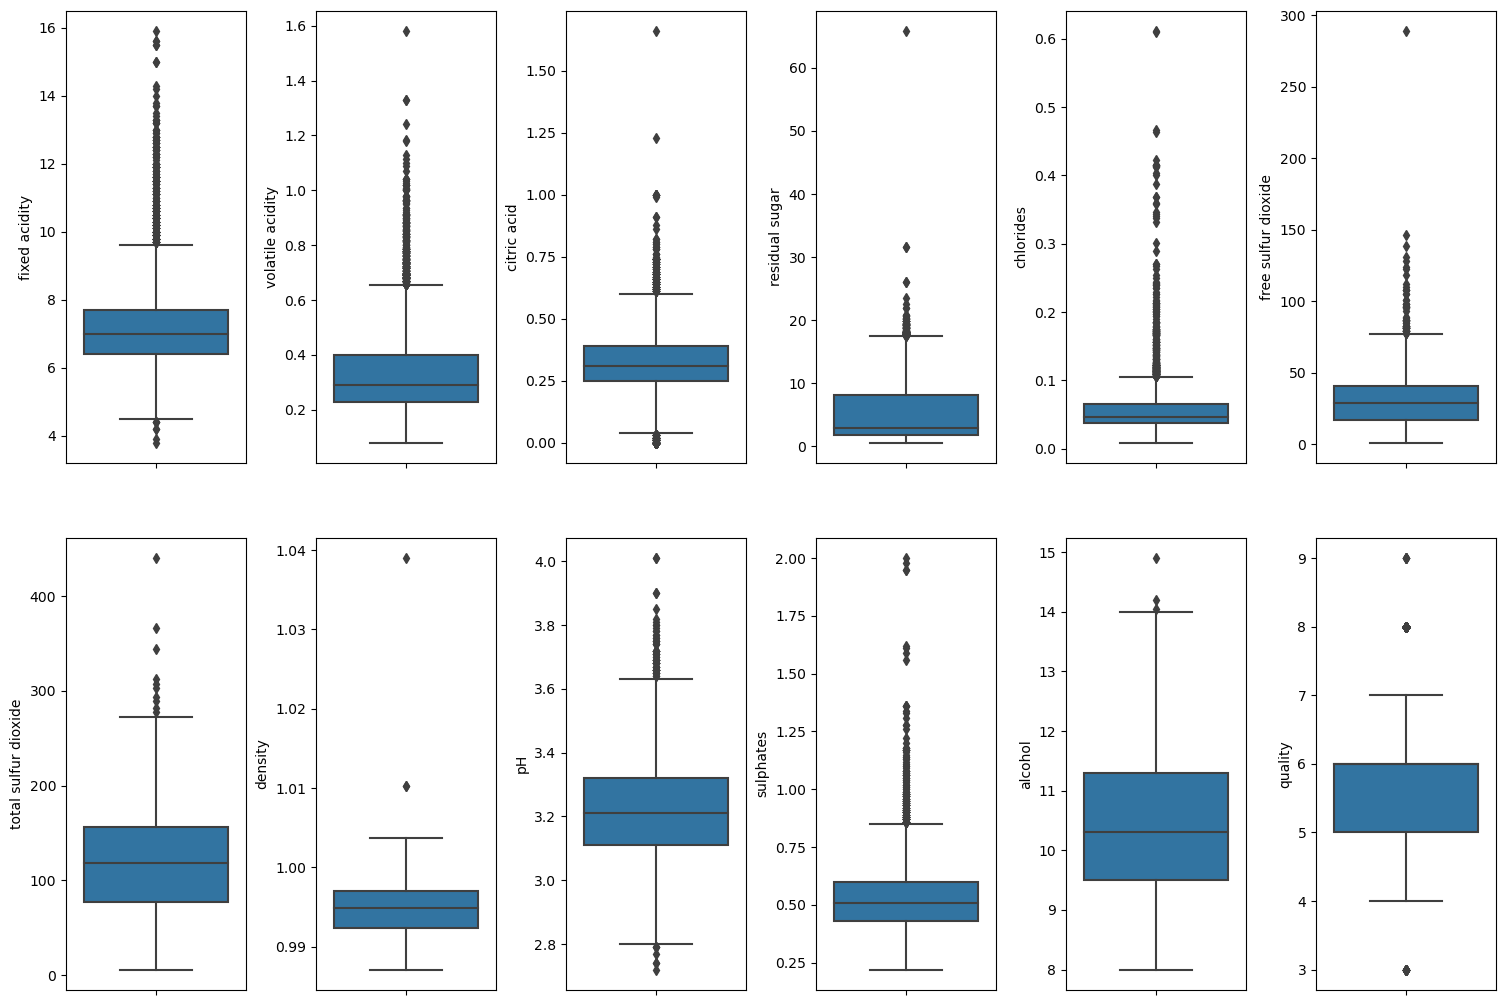

In [23]:
# creating boxplots to detect outliers
fig, axis = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = axis.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
        
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

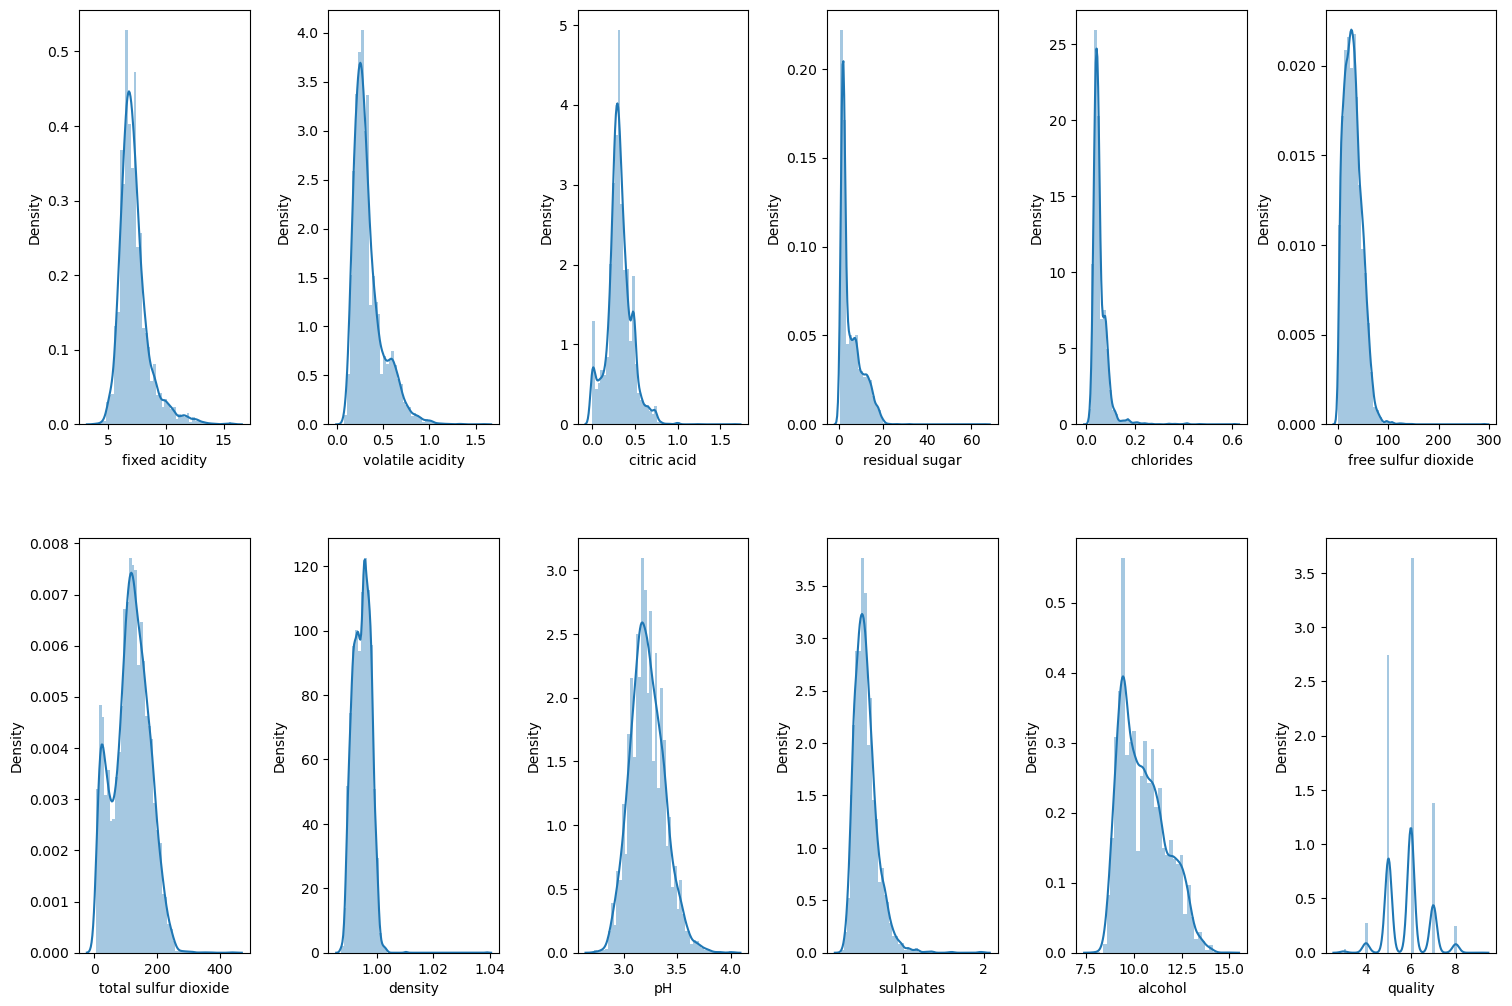

In [25]:
# creating distribution plot
# creating boxplots to detect outliers
fig, axis = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = axis.flatten()

for col, value in data.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
        
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [27]:
# Log transformation
data['free sulfur dioxide'] = np.log(1 + data['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

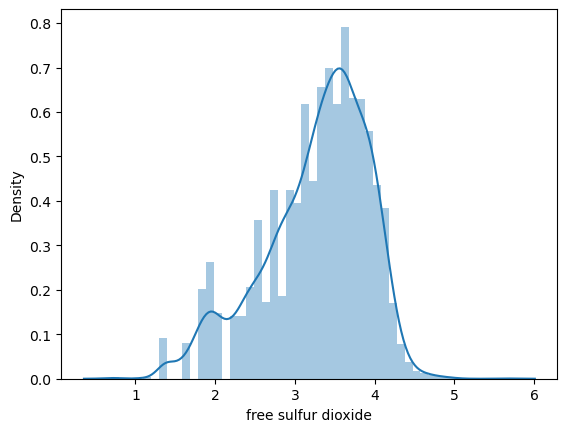

In [29]:
sns.distplot(data['free sulfur dioxide'])

<AxesSubplot:xlabel='type', ylabel='count'>

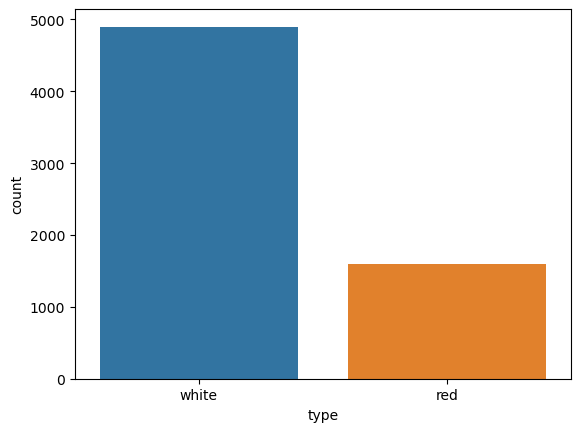

In [30]:
sns.countplot(data['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

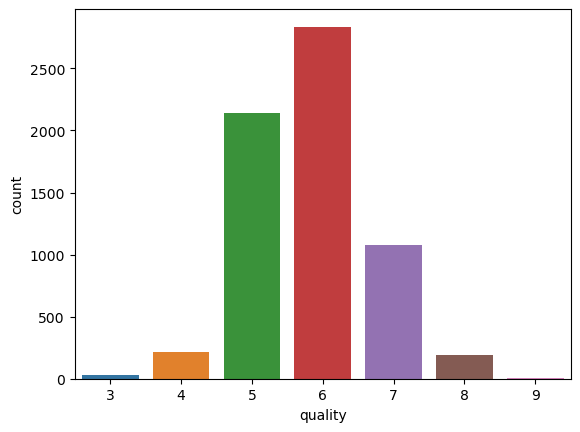

In [31]:
sns.countplot(data['quality'])

# Correlation Matrix

<AxesSubplot:>

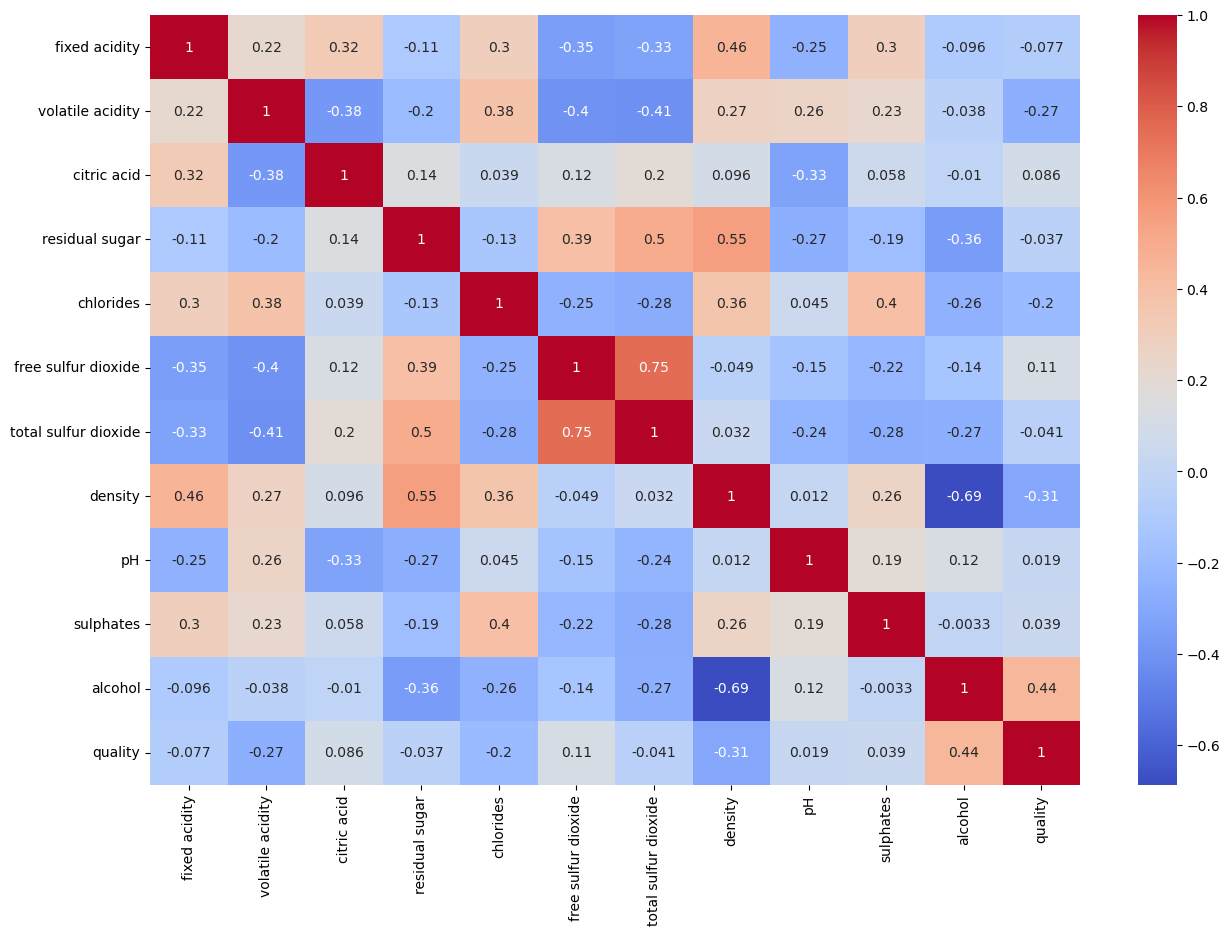

In [43]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Input Split

In [200]:
X = data.drop(columns=['type', 'quality'])
Y = data['quality']

# Class Imbalancement

In [201]:
Y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [114]:
!pip install imbalanced-learn

In [202]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

# transforming the dataset
X, Y = oversample.fit_resample(X, Y)

In [203]:
Y.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

# Model Training

In [339]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
# training - 70%
# testing - 30%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=23)

In [340]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [341]:
# training the model
model.fit(x_train, y_train)
print("Accuracy:", model.score(x_test, y_test) * 100,"%")

Accuracy: 57.64388375570789 %
